In [7]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

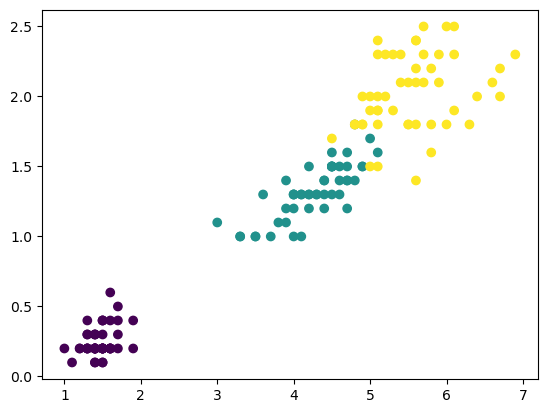

In [8]:

import numpy as np
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [9]:

k = 3
random_index = np.random.choice(range(len(X)), k)
centroids = X[random_index]

In [10]:
random_index

array([130,  13,  27])

In [11]:
centroids

array([[6.1, 1.9],
       [1.1, 0.1],
       [1.5, 0.2]])

In [12]:
print(X[[0,2]])

[[1.4 0.2]
 [1.3 0.2]]


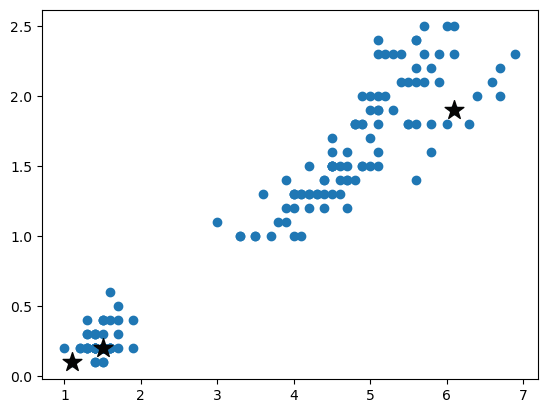

In [13]:

def visualize_centroids(X, centroids):
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    plt.show()


visualize_centroids(X, centroids)

In [14]:

def dist(a, b):
    return np.linalg.norm(a - b, axis=1)


In [15]:

def assign_cluster(x, centroids):
    distances = dist(x, centroids)
    cluster = np.argmin(distances)
    return cluster

In [16]:
a = X[0] - centroids
print(a)
print(np.linalg.norm(a, axis = 1))


[[-4.7 -1.7]
 [ 0.3  0.1]
 [-0.1  0. ]]
[4.9979996  0.31622777 0.1       ]


In [17]:

def update_centroids(X, centroids, clusters):
    for i in range(k):
        cluster_i = np.where(clusters == i)
        centroids[i] = np.mean(X[cluster_i], axis=0)

In [18]:

clusters = np.zeros(len(X))

tol = 0.0001
max_iter = 100

iter = 0
centroids_diff = 100000

Iteration: 1
Centroids:
 [[5.01827957 1.72258065]
 [1.125      0.175     ]
 [1.74528302 0.35849057]]
Centroids move: 1.1372


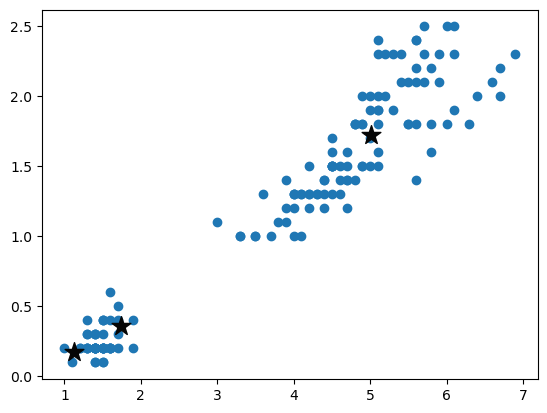

Iteration: 2
Centroids:
 [[4.95876289 1.69587629]
 [1.325      0.21666667]
 [1.75517241 0.35172414]]
Centroids move: 0.2148


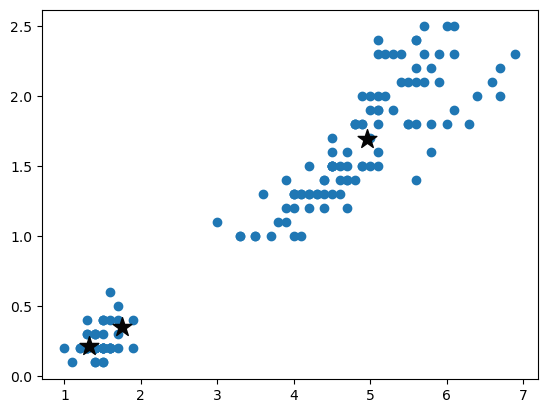

Iteration: 3
Centroids:
 [[4.95876289 1.69587629]
 [1.38648649 0.22432432]
 [1.9625     0.44375   ]]
Centroids move: 0.2351


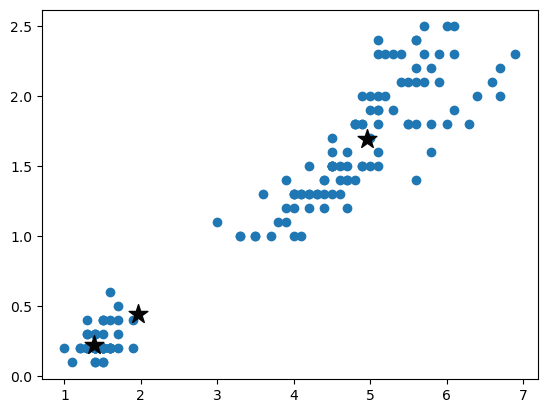

Iteration: 4
Centroids:
 [[4.95876289 1.69587629]
 [1.42272727 0.225     ]
 [2.23333333 0.61111111]]
Centroids move: 0.3204


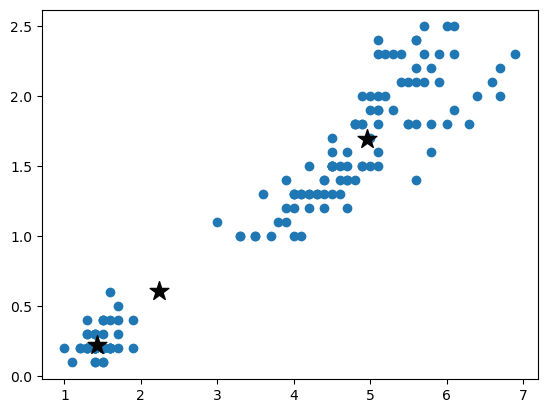

Iteration: 5
Centroids:
 [[4.98947368 1.71052632]
 [1.45306122 0.24285714]
 [3.08333333 0.91666667]]
Centroids move: 0.9046


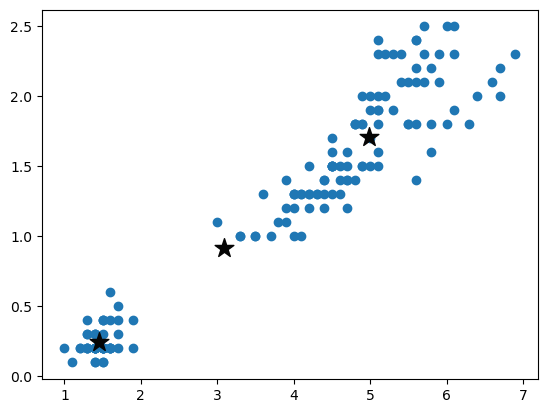

Iteration: 6
Centroids:
 [[5.14578313 1.78674699]
 [1.462      0.246     ]
 [3.73529412 1.13529412]]
Centroids move: 0.7094


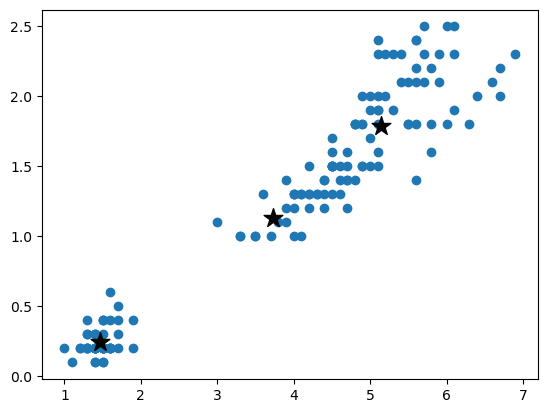

Iteration: 7
Centroids:
 [[5.30571429 1.87428571]
 [1.462      0.246     ]
 [3.97333333 1.21333333]]
Centroids move: 0.3098


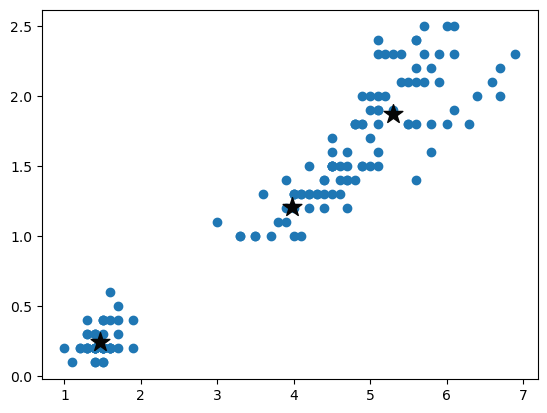

Iteration: 8
Centroids:
 [[5.47368421 1.96842105]
 [1.462      0.246     ]
 [4.15348837 1.28837209]]
Centroids move: 0.2742


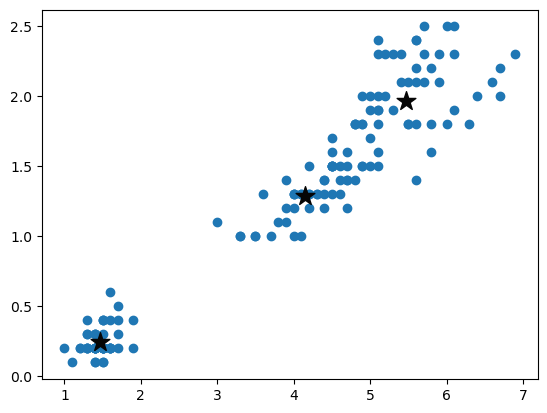

Iteration: 9
Centroids:
 [[5.51481481 1.99444444]
 [1.462      0.246     ]
 [4.19130435 1.30217391]]
Centroids move: 0.0632


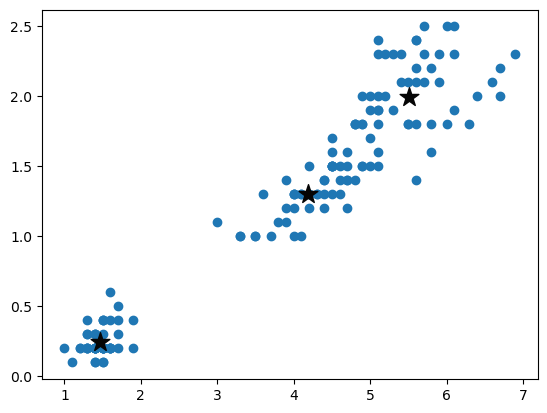

Iteration: 10
Centroids:
 [[5.53846154 2.01346154]
 [1.462      0.246     ]
 [4.22083333 1.31041667]]
Centroids move: 0.0431


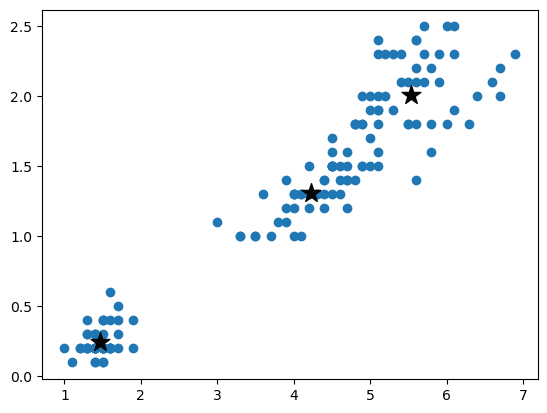

Iteration: 11
Centroids:
 [[5.58367347 2.02653061]
 [1.462      0.246     ]
 [4.25490196 1.33921569]]
Centroids move: 0.0648


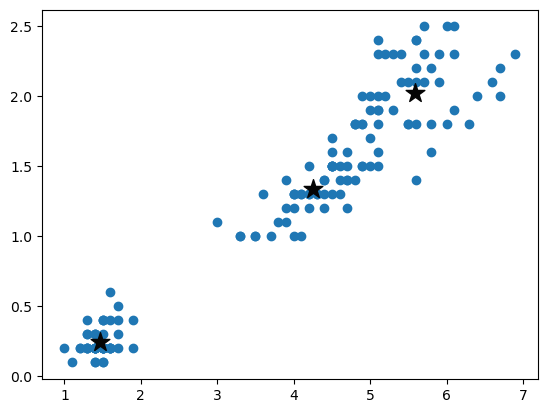

Iteration: 12
Centroids:
 [[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]
Centroids move: 0.0220


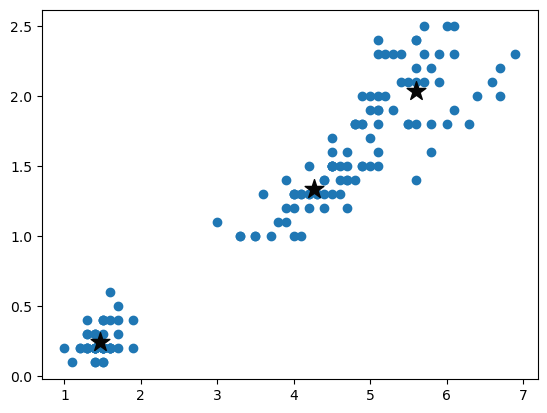

Iteration: 13
Centroids:
 [[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]
Centroids move: 0.0000


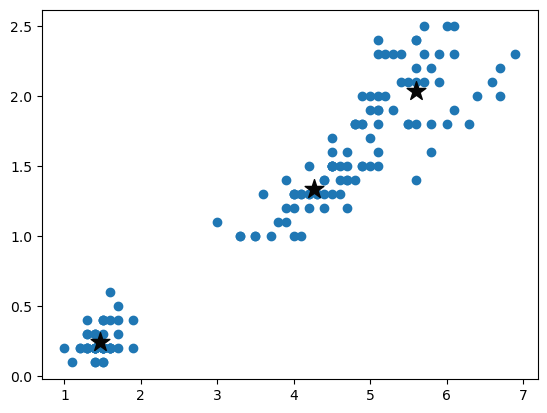

In [19]:

from copy import deepcopy
while iter < max_iter and centroids_diff > tol:
    for i in range(len(X)):
        clusters[i] = assign_cluster(X[i], centroids)
    centroids_prev = deepcopy(centroids)
    update_centroids(X, centroids, clusters)
    iter += 1
    centroids_diff = np.linalg.norm(centroids - centroids_prev)
    print('Iteration:', str(iter))
    print('Centroids:\n', centroids)
    print('Centroids move: {:5.4f}'.format(centroids_diff))
    visualize_centroids(X, centroids)

In [20]:
mat = np.array([[ 4],
               [3]])
 
# compute norm of matrix
mat_norm = np.linalg.norm(mat)
 
print("Matrix norm:")
print(mat_norm)

Matrix norm:
5.0


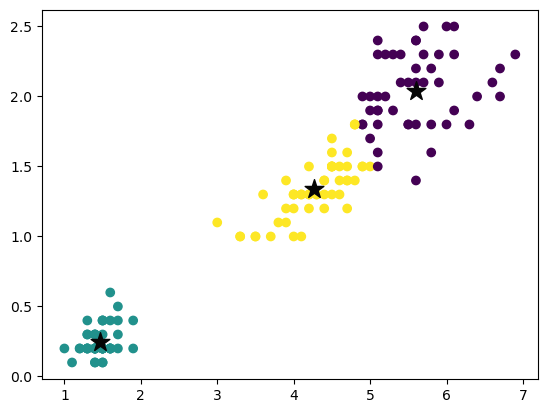

In [21]:

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.show()

In [22]:

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

from matplotlib import pyplot as plt

k = 3

In [ ]:

from sklearn.cluster import KMeans
kmeans_sk = KMeans(n_clusters=3, random_state=42)
kmeans_sk.fit(X)
clusters_sk = kmeans_sk.labels_
centroids_sk = kmeans_sk.cluster_centers_


plt.scatter(X[:, 0], X[:, 1], c=clusters_sk)
plt.scatter(centroids_sk[:, 0], centroids_sk[:, 1], marker='*', s=200, c='#050505')
plt.show()

In [2]:


from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:

iris = datasets.load_iris()
X = iris.data
y = iris.target


k_list = list(range(1, 7))
sse_list = [0] * len(k_list)


In [ ]:

for k_ind, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_

    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)

        sse += np.linalg.norm(X[cluster_i] - centroids[i])

    print('k={}, SSE={}'.format(k, sse))
    sse_list[k_ind] = sse


In [1]:

plt.plot(k_list, sse_list)
plt.show()

NameError: name 'plt' is not defined